LOGISTIC REGRESSION:  
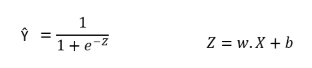

y-hat -> predicted value  (lies btw 0 & 1)  
x -> independent variable  
w -> weight (total no.of input_features)  
b -> bias
   

**GRADIENT DECENT:**  
optimizitation algorithm for minimizing loss function. used for updating the parameters in the learning model.  
w = w - a * dw  
b = b - a * db  
a (alpha) -> learning rate

**LERNING RATE:**  
it is an tuning parameter in optimization which sets the step size at each iteration while moving towards the minimum loss function.  

**DERIVATIVES:**  
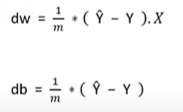

**WORKFLOW:**  
1. Set learning rate, no.of iterations; initiate random weight & bias value.  
2. Build logistic regression function (sigmoid function).  
3. Update parameter using gradient decent.  
Finally we'll get the best model with minimum cost function.  
4. Build predict function to determine the class of the data point.

Importing the dependencies

In [13]:
import numpy as np

Logistic Regresssion

In [14]:
class Logistic_Regression():

  # initiating parameters for class (learning rate & no.of iterations -> hyper parameters)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  # to fit the dataset to the model
  def fit(self,X, Y):

    #find no.of input_features(n / total_number_of_weight_value) & no.of datpoints(m)
    self.m, self.n = X.shape

    #initiating weight & bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing gradient descent for optimization
    for i in range(self.no_of_iterations):
      self.update_weights()


  # to update the weight & bias to minimize loss function
  def update_weights(self):

    # y_hat formula (sigmoid function)
    Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)) ) # z = w.X + b

    # derivatives
    dw = (1 / self.m) * np.dot(self.X.T, (Y_hat - self.Y)) # why transpose? the col of 1st matrix [769 x 8] must be equal to the row of 2nd matrix [769 x 1]. Transpose of X = [8 x 769]; y = [769 x 1]
    db = (1 / self.m) * np.sum(Y_hat - self.Y)

    #updating weights & bias using gradient descent equation
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  # to predict the y value (sigmoid equation & decision boundary)
  def predict(self, X):
    Y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)) )
    Y_pred = np.where(Y_pred >0.5, 1,0)
    return Y_pred


importing the dependencies

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data collection & analysis

In [16]:
#loading the csv file to pandas data frame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [17]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [19]:
diabetes_dataset.shape

(768, 9)

In [20]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [21]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


1 -> diabetic   
0 -> non-diabetic

In [24]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [23]:
# seperating features & target
features = diabetes_dataset.drop(columns='Outcome', axis=1)
target = diabetes_dataset['Outcome']
print(features)
print(target)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization -> converting the values of feature datas to similar range

In [25]:
Scalar = StandardScaler()

In [27]:
Scalar.fit(features)

StandardScaler()

In [28]:
standardized_data = Scalar.transform(features)

In [29]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [30]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [31]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [33]:
print(features.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [34]:
model = Logistic_Regression(learning_rate= 0.01, no_of_iterations=1000)

In [36]:
model.fit(X_train, Y_train)

Model Evaluation (accuracy score)

In [40]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('The training data accuracy is' , training_data_accuracy)

The training data accuracy is 0.7768729641693811


In [41]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('The testing data accuracy is' , testing_data_accuracy)


The testing data accuracy is 0.7662337662337663


Making Predictive System

In [43]:
input_data = (5,0,0,0,175,0.8,0.587,51)

#change the input_data to numpy array
input_as_numpy = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_as_numpy.reshape(1,-1)

#standardize the input data
std_data = Scalar.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
